In [1]:
%matplotlib inline

In [2]:
from matplotlib import dates


In [3]:
from transit_parser import *

In [4]:
TEST = './test/'
TRAINS = './trains/'
def examine_train(filename, folder=TEST):
    train_name = folder + filename
    t = TrainParser(train_name)
    times = t.get_stop_times()
    rows = t.get_rows(times)
    df = t.get_df(rows)
    performance = t.join_schedule(df)
    print t.is_valid(performance)
    return performance[['from', 'to','status', 'time', 'expected','train_id', 'line']]

In [5]:
pd.set_option('display.height', 100)

height has been deprecated.



## NJ Transit 

In [21]:
df = examine_train('2018_03_02_3861', TEST)


True


In [22]:
df

,from,to,status,time,expected,train_id,line
0,New York Penn Station,New York Penn Station,Departed,2018-03-02 16:29:12,2018-03-02 16:29:00,3861,Northeast Corrdr
1,New York Penn Station,Secaucus Upper Lvl,Departed,2018-03-02 16:50:17,2018-03-02 16:38:00,3861,Northeast Corrdr
2,Secaucus Upper Lvl,Newark Penn Station,Departed,2018-03-02 17:44:29,2018-03-02 16:50:00,3861,Northeast Corrdr
3,Newark Penn Station,Newark Airport,Departed,2018-03-02 17:59:23,2018-03-02 16:56:00,3861,Northeast Corrdr
4,Newark Airport,North Elizabeth,Departed,2018-03-02 18:27:25,2018-03-02 16:59:00,3861,Northeast Corrdr
5,North Elizabeth,Elizabeth,None,2018-03-02 18:28:00,2018-03-02 17:02:00,3861,Northeast Corrdr
6,Elizabeth,Linden,None,2018-03-02 18:32:00,2018-03-02 17:07:00,3861,Northeast Corrdr
7,Linden,Rahway,None,2018-03-02 18:36:00,2018-03-02 17:11:00,3861,Northeast Corrdr
8,Rahway,Metropark,None,2018-03-02 18:41:00,2018-03-02 17:16:00,3861,Northeast Corrdr
9,Metropark,Metuchen,None,2018-03-02 18:46:00,2018-03-02 17:21:00,3861,Northeast Corrdr


In [7]:
df = examine_train('2018_02_07_3928', TEST)
df1 = examine_train('2018_02_07_3714', TEST)
df2 = examine_train('2018_02_07_3828', TEST)
df3 = examine_train('2018_02_07_3712', TEST)
df4 = examine_train('2018_02_07_3126', TEST)

True
True
True
True
True


In [12]:
df4

,from,to,status,time,expected,train_id,line
stop_num,,,,,,,
1,New Brunswick,New Brunswick,Cancelled,2018-02-07 07:46:15,2018-02-07 07:34:00,3126,Northeast Corrdr
2,New Brunswick,Edison,Cancelled,2018-02-07 07:46:15,2018-02-07 07:39:00,3126,Northeast Corrdr
3,Edison,Metuchen,Cancelled,2018-02-07 07:46:15,2018-02-07 07:44:00,3126,Northeast Corrdr
4,Metuchen,Metropark,Cancelled,2018-02-07 07:46:15,2018-02-07 07:50:00,3126,Northeast Corrdr
5,Metropark,Newark Airport,Cancelled,2018-02-07 07:46:15,2018-02-07 08:03:00,3126,Northeast Corrdr
6,Newark Airport,Newark Penn Station,Cancelled,2018-02-07 07:46:15,2018-02-07 08:10:00,3126,Northeast Corrdr
7,Newark Penn Station,Secaucus Upper Lvl,Cancelled,2018-02-07 07:46:15,2018-02-07 08:17:00,3126,Northeast Corrdr
8,Secaucus Upper Lvl,New York Penn Station,Cancelled,2018-02-07 08:45:00,2018-02-07 08:32:00,3126,Northeast Corrdr


In [11]:
df3

,from,to,status,time,expected,train_id,line
stop_num,,,,,,,
1,Jersey Avenue,Jersey Avenue,Departed,2018-02-07 07:39:15,2018-02-07 07:39:00,3712,Northeast Corrdr
2,Jersey Avenue,New Brunswick,Departed,2018-02-07 07:45:07,2018-02-07 07:44:00,3712,Northeast Corrdr
3,New Brunswick,Edison,Departed,2018-02-07 07:50:10,2018-02-07 07:49:00,3712,Northeast Corrdr
4,Edison,Metuchen,Departed,2018-02-07 08:08:13,2018-02-07 07:55:00,3712,Northeast Corrdr
5,Metuchen,Metropark,Departed,2018-02-07 08:13:16,2018-02-07 08:00:00,3712,Northeast Corrdr
6,Metropark,Newark Penn Station,Departed,2018-02-07 08:31:15,2018-02-07 08:16:00,3712,Northeast Corrdr
7,Newark Penn Station,Secaucus Upper Lvl,Departed,2018-02-07 08:43:08,2018-02-07 08:23:00,3712,Northeast Corrdr
8,Secaucus Upper Lvl,New York Penn Station,Departed,2018-02-07 08:57:00,2018-02-07 08:36:00,3712,Northeast Corrdr


In [10]:
df2

,from,to,status,time,expected,train_id,line
stop_num,,,,,,,
1,Trenton,Trenton,Departed,2018-02-07 07:22:20,2018-02-07 07:23:00,3828,Northeast Corrdr
2,Trenton,Hamilton,Departed,2018-02-07 07:32:19,2018-02-07 07:29:00,3828,Northeast Corrdr
3,Hamilton,Princeton Junction,Departed,2018-02-07 07:39:25,2018-02-07 07:36:00,3828,Northeast Corrdr
4,Princeton Junction,New Brunswick,Departed,2018-02-07 08:03:26,2018-02-07 07:54:00,3828,Northeast Corrdr
5,New Brunswick,Edison,Departed,2018-02-07 08:08:22,2018-02-07 07:59:00,3828,Northeast Corrdr
6,Edison,Metuchen,Departed,2018-02-07 08:17:18,2018-02-07 08:04:00,3828,Northeast Corrdr
7,Metuchen,Metropark,Departed,2018-02-07 08:21:16,2018-02-07 08:09:00,3828,Northeast Corrdr
8,Metropark,Rahway,Departed,2018-02-07 08:27:18,2018-02-07 08:18:00,3828,Northeast Corrdr
9,Rahway,Linden,Departed,2018-02-07 08:32:19,2018-02-07 08:23:00,3828,Northeast Corrdr


In [9]:
df1

,from,to,status,time,expected,train_id,line
stop_num,,,,,,,
1,Jersey Avenue,Jersey Avenue,Departed,2018-02-07 07:55:10,2018-02-07 07:55:00,3714,Northeast Corrdr
2,Jersey Avenue,New Brunswick,Departed,2018-02-07 08:02:08,2018-02-07 08:01:00,3714,Northeast Corrdr
3,New Brunswick,Edison,Departed,2018-02-07 08:07:16,2018-02-07 08:06:00,3714,Northeast Corrdr
4,Edison,Metuchen,Departed,2018-02-07 08:12:08,2018-02-07 08:12:00,3714,Northeast Corrdr
5,Metuchen,Metropark,Departed,2018-02-07 08:17:09,2018-02-07 08:17:00,3714,Northeast Corrdr
6,Metropark,Newark Penn Station,Departed,2018-02-07 08:47:09,2018-02-07 08:35:00,3714,Northeast Corrdr
7,Newark Penn Station,Secaucus Upper Lvl,Departed,2018-02-07 08:58:15,2018-02-07 08:43:00,3714,Northeast Corrdr
8,Secaucus Upper Lvl,New York Penn Station,Departed,2018-02-07 09:08:00,2018-02-07 08:57:00,3714,Northeast Corrdr


In [8]:
df

,from,to,status,time,expected,train_id,line
stop_num,,,,,,,
1,Trenton,Trenton,Departed,2018-02-07 07:50:03,2018-02-07 07:50:00,3928,Northeast Corrdr
2,Trenton,Hamilton,Departed,2018-02-07 07:58:06,2018-02-07 07:57:00,3928,Northeast Corrdr
3,Hamilton,Princeton Junction,Departed,2018-02-07 08:06:10,2018-02-07 08:05:00,3928,Northeast Corrdr
4,Princeton Junction,New Brunswick,Departed,2018-02-07 08:21:00,2018-02-07 08:21:00,3928,Northeast Corrdr
5,New Brunswick,Metropark,Departed,2018-02-07 08:33:10,2018-02-07 08:31:00,3928,Northeast Corrdr
6,Metropark,Newark Airport,Departed,2018-02-07 08:51:01,2018-02-07 08:44:00,3928,Northeast Corrdr
7,Newark Airport,Newark Penn Station,Departed,2018-02-07 08:58:09,2018-02-07 08:51:00,3928,Northeast Corrdr
8,Newark Penn Station,Secaucus Upper Lvl,Departed,2018-02-07 09:06:09,2018-02-07 09:00:00,3928,Northeast Corrdr
9,Secaucus Upper Lvl,New York Penn Station,Departed,2018-02-07 09:16:00,2018-02-07 09:14:00,3928,Northeast Corrdr


## Amtrak

In [5]:
examine_train('2018_02_02_A2172', TRAINS)

station Philadelphia
station Metropark
station Newark Penn Station
station New York Penn Station
4
True


,from,to,status,time,expected,train_id,line
stop_num,,,,,,,
1,Philadelphia,Philadelphia,Departed,2018-02-02 17:31:10,None,A2172,ACELA EXPRESS
2,Philadelphia,Metropark,Departed,2018-02-02 18:20:15,None,A2172,ACELA EXPRESS
3,Metropark,Newark Penn Station,Departed,2018-02-02 18:34:17,None,A2172,ACELA EXPRESS
4,Newark Penn Station,New York Penn Station,Departed,2018-02-02 19:04:07,None,A2172,ACELA EXPRESS


In [6]:
examine_train('2018_02_02_A643', TRAINS)

station Newark Penn Station
station Trenton
station Philadelphia
3
True


,from,to,status,time,expected,train_id,line
stop_num,,,,,,,
1,Newark Penn Station,Newark Penn Station,Departed,2018-02-02 09:46:12,None,A643,KEYSTONE
2,Newark Penn Station,Trenton,Departed,2018-02-02 10:23:11,None,A643,KEYSTONE
3,Trenton,Philadelphia,Departed,2018-02-02 11:00:05,None,A643,KEYSTONE


In [97]:
all_trains = pd.read_csv('./2018_02_02.csv')

In [150]:
all_trains2 = pd.read_csv('./2018_02_01.csv')

In [153]:
all_trains['expected'] = pd.to_datetime(all_trains['expected'])
all_trains2['expected'] = pd.to_datetime(all_trains2['expected'])

In [151]:
all_trains['time'] = pd.to_datetime(all_trains['time'])
all_trains2['time'] = pd.to_datetime(all_trains2['time'])

In [154]:
all_trains['delay']=(all_trains['time']-all_trains['expected']).dt.total_seconds()
all_trains2['delay']=(all_trains2['time']-all_trains2['expected']).dt.total_seconds()

In [155]:
def clean_delay(sec):
    if sec < 0:
        return 0
    else:
        return sec

In [166]:
all_trains['train_id'].nunique()

839

In [167]:
all_trains2['train_id'].nunique()

829

In [156]:
all_trains['delay'] = all_trains['delay'].apply(lambda x: clean_delay(x))/60.0
all_trains2['delay'] = all_trains2['delay'].apply(lambda x: clean_delay(x))/60.0

In [162]:
cum_delay = all_trains.groupby('train_id').last()
cum_delay2 = all_trains2.groupby('train_id').last()

In [163]:
njt_nyp = cum_delay[(cum_delay['type']=="NJ Transit") & (cum_delay['to']=="New York Penn Station")]
njt_nyp2 = cum_delay2[(cum_delay2['type']=="NJ Transit") & (cum_delay2['to']=="New York Penn Station")]

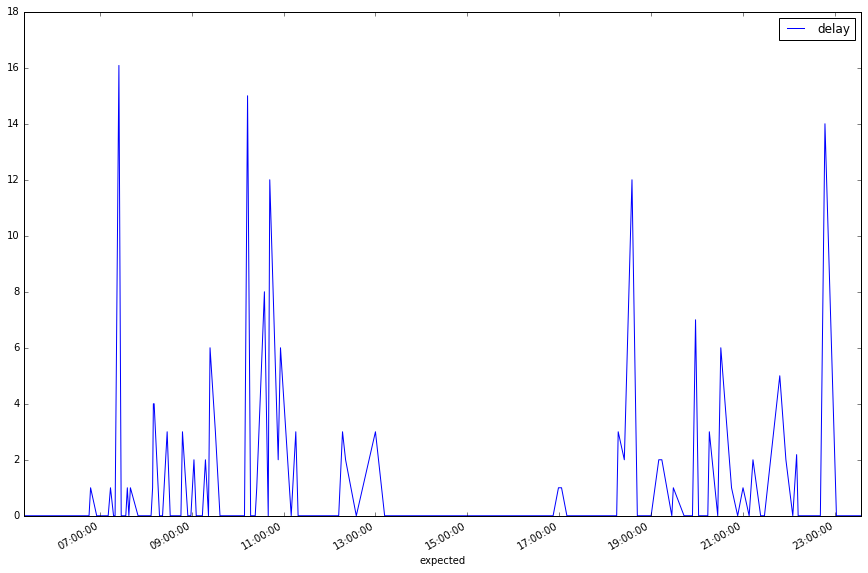

In [164]:
njt_nyp2.plot(x="expected", y="delay", figsize=(15,10))

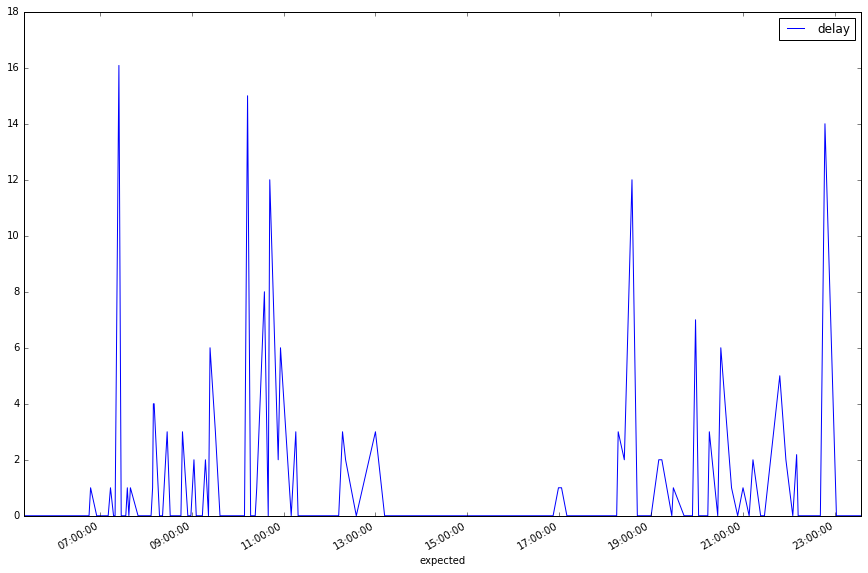

In [181]:
njt_nyp2.plot(x="expected", y="delay", figsize=(15,10))

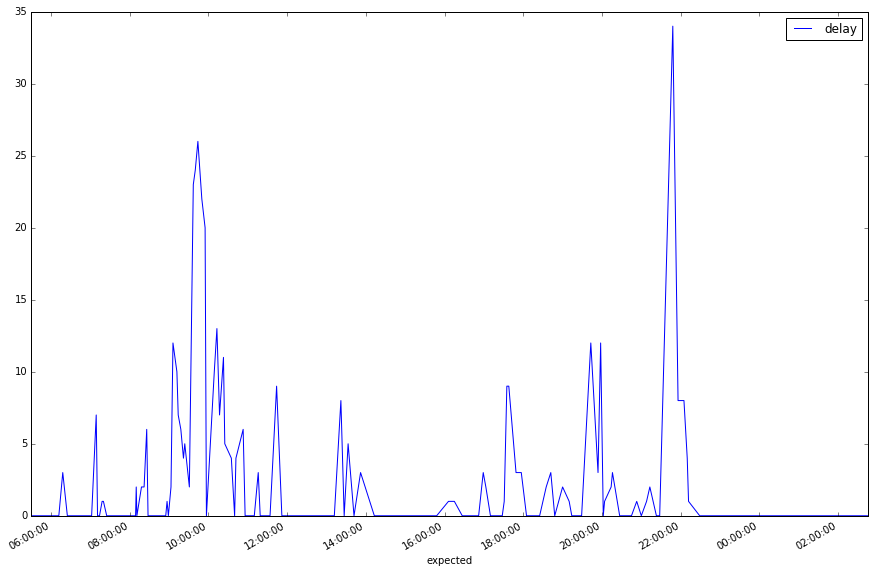

In [149]:
njt_nyp.plot(x="expected", y="delay", figsize=(15,10))

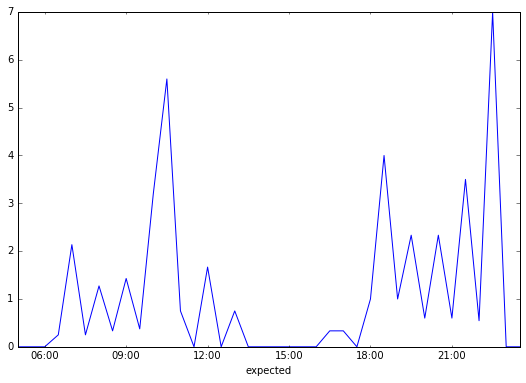

In [182]:
njt_nyp2.groupby(pd.Grouper(key='expected', freq='30min'))['delay'].mean().plot(figsize=(9,6))

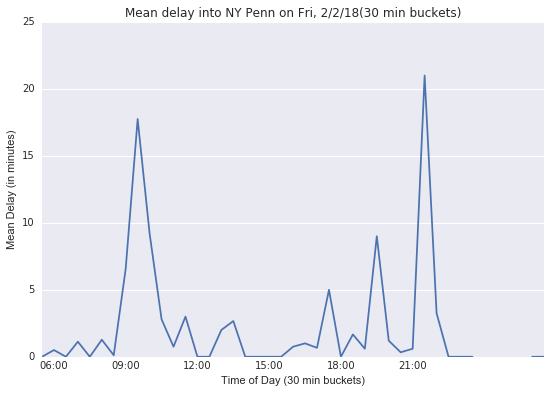

In [204]:
ax = njt_nyp.groupby(pd.Grouper(key='expected', freq='30min'))['delay'].mean().plot(figsize=(9,6), title="Mean delay into NY Penn on Fri, 2/2/18(30 min buckets)")
ax.set_xlabel("Time of Day (30 min buckets)")
ax.set_ylabel("Mean Delay (in minutes)")
hours = dates.HourLocator()
ax.get_xaxis().set_major_locator(hours)


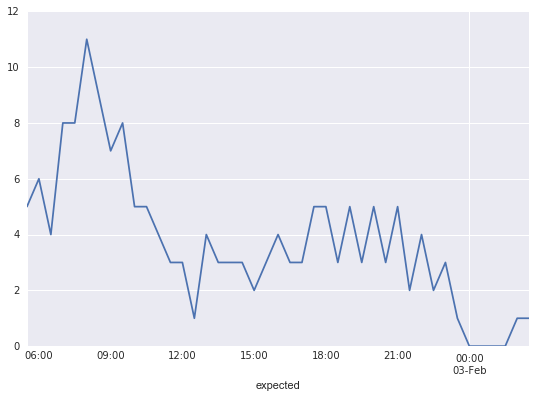

In [191]:
njt_nyp.groupby(pd.Grouper(key='expected', freq='30min')).size().plot(figsize=(9,6))